In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pyplot as plt
from scipy.stats import mode

In [20]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print(iris.data.shape)

(150, 4)


In [9]:
# Calculate the mean vector of Iris dataset
mean_vector = np.mean(X, axis=0)
mean_vector

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [10]:
# Find the 110 closest nearest neighbors to the mean vector
nbrs = NearestNeighbors(n_neighbors=110).fit(X)
distances, indices = nbrs.kneighbors([mean_vector])
nbrs

NearestNeighbors(n_neighbors=110)

In [11]:
# Discard the farthest 40 examples
indices = indices.squeeze()[:110]
indices

array([ 64,  82,  88,  71,  99,  95,  96,  92,  67,  61,  79,  94,  69,
        97,  89,  80,  81,  59,  74,  55,  78,  66,  90,  53,  91,  84,
        85,  62,  51,  63,  73,  75,  65,  87,  54,  56,  58,  98,  70,
       138,  68,  93,  57, 126,  86, 127,  72,  60, 123, 106, 121,  76,
        83, 133, 149,  50, 119, 101, 142,  52, 113,  77, 146, 110, 147,
       111, 114, 137, 134, 116, 115, 103, 145, 141, 148, 128, 139, 112,
       132, 136,  44,  23, 124,  20, 140, 108, 104,  18,  24,   5,  43,
        31, 120,  26, 129, 144,  25,  21,  10,  27, 143,  30,  46,  39,
        48,  11,   7, 102,  29, 100])

In [12]:

# Create the new dataset with 110 examples
X_new = X[indices]
y_new = y[indices]

print(X_new.data.shape)
print(y_new.data.shape)

(110, 4)
(110,)


In [13]:
# Split the new dataset 50-50 into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.5, random_state=220)

In [14]:
errors = []
for n_neighbors in range(1, 11):
    # Train the nearest neighbor classifier
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train, y_train)

    # Calculate the error rate on the test set
    error = 1 - knn_clf.score(X_test, y_test)
    errors.append(error)

    print(f"K={n_neighbors}, Error rate: {error}")

K=1, Error rate: 0.12727272727272732
K=2, Error rate: 0.18181818181818177
K=3, Error rate: 0.054545454545454564
K=4, Error rate: 0.10909090909090913
K=5, Error rate: 0.036363636363636376
K=6, Error rate: 0.07272727272727275
K=7, Error rate: 0.054545454545454564
K=8, Error rate: 0.09090909090909094
K=9, Error rate: 0.09090909090909094
K=10, Error rate: 0.10909090909090913


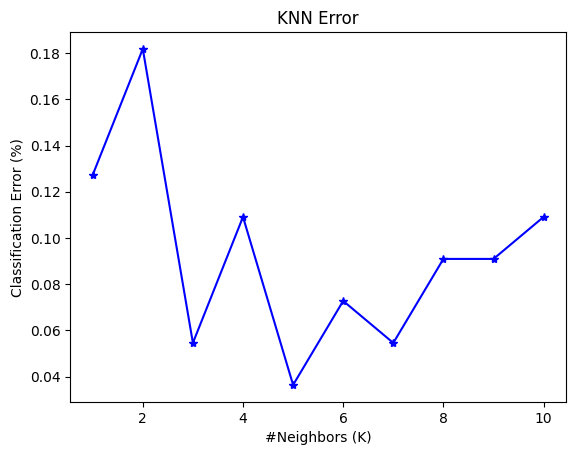

In [16]:
# Plot the error as a function of K
plt.figure()
plt.plot(range(1, 11), errors, color='b', marker='*')
plt.xlabel("#Neighbors (K)")
plt.ylabel("Classification Error (%)")
plt.title("KNN Error")
plt.show()

In [17]:
# Print the mean vector
print("4D Mean Vector:")
print(mean_vector)

4D Mean Vector:
[5.84333333 3.05733333 3.758      1.19933333]


In [18]:
# Print the index of the closest example to the mean vector
print("Index of the closest example to the mean vector:", indices[0])

Index of the closest example to the mean vector: 64
